In [1]:
from seleniumbase import Driver
from selenium.webdriver.common.keys import Keys

from rich.pretty import pprint
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [21]:
driver =  Driver(uc=True, uc_cdp_events=True)

In [22]:
driver.open(
    "https://www.marinetraffic.com/en/ais/home/centerx:132.2/centery:43.0/zoom:10")
driver.sleep(3)

# Close cookie notice
try:
    driver.click('button:contains("AGREE")', timeout=3)
except Exception as e:
    pass

In [5]:
def urlPositionParser(url):
    regex = r"centerx:(\-?\d+(?:\.\d+)*)/centery:(\-?\d+(?:\.\d+)*)/zoom:(\d+)"
    matches = re.findall(regex, url)
    data = {}
    data["x"] = float(matches[0][0])
    data["y"] = float(matches[0][1])
    data["zoom"] = int(matches[0][2])
    return data

def getCurrentPosition():
  driver.sleep(1.5)
  return urlPositionParser(driver.current_url)

In [6]:
zoomes = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [7]:
getCurrentPosition()

{'x': 132.2, 'y': 43.0, 'zoom': 10}

In [8]:
# Basic movement functions

def moveX(steps):
    map = driver.find_element("div#map_canvas")
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            map.send_keys(Keys.ARROW_LEFT)
            driver.sleep(0.4)
    else:
        for i in range(steps):
            map.send_keys(Keys.ARROW_RIGHT)
            driver.sleep(0.4)


def moveY(steps):
    map = driver.find_element("div#map_canvas")
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            map.send_keys(Keys.ARROW_DOWN)
            driver.sleep(0.4)
    else:
        for i in range(steps):
            map.send_keys(Keys.ARROW_UP)
            driver.sleep(0.4)


def zoomInOut(steps):
    if (steps < 0):
        steps = abs(steps)
        for i in range(steps):
            driver.click('a[title="Zoom out"]')
            driver.sleep(0.8)
    else:
        for i in range(steps):
            driver.click('a[title="Zoom in"]')
            driver.sleep(0.8)


def zoomSet(targetZoom):
    currentZoom = getCurrentPosition()["zoom"]
    deltaZoom = targetZoom - currentZoom
    zoomInOut(deltaZoom)

In [9]:
def movementXCalcDelta(zoom, steps):
  zoomSet(zoom)

  pos = getCurrentPosition()["x"]

  deltas = []

  for i in range(steps):
    moveX(1)
    newpos = getCurrentPosition()["x"]
    delta = newpos - pos
    if delta != 0:
      deltas.append(delta)
      pos = newpos

  return deltas

def movementYCalcDelta(zoom, steps):
  zoomSet(zoom)

  pos = getCurrentPosition()["y"]

  deltas = []

  for i in range(steps):
    moveY(1)
    newpos = getCurrentPosition()["y"]
    delta = newpos - pos
    if delta != 0:
      deltas.append(delta)
      pos = newpos

  return deltas

In [ ]:
dataDeltasX = []
for zoom in zoomes:
    driver.open(
        "https://www.marinetraffic.com/en/ais/home/centerx:10.0/centery:10.0/zoom:10")
    driver.sleep(3)
    deltas = movementXCalcDelta(zoom, 5)
    dataDeltasX.append(deltas)
dataDeltasX

In [ ]:
dataDeltasY = []
for zoom in zoomes:
    driver.open(
        "https://www.marinetraffic.com/en/ais/home/centerx:10.0/centery:10.0/zoom:10")
    driver.sleep(3)
    deltas = movementYCalcDelta(zoom, 5)
    dataDeltasY.append(deltas)
dataDeltasY

In [33]:
[np.mean(item) for item in dataDeltasX]

[3.5200000000000005,
 1.7600000000000002,
 0.8800000000000001,
 0.43999999999999984,
 0.21999999999999992,
 0.1,
 0.10000000000000024,
 0.02740000000000009,
 0.013800000000000168,
 0.006800000000000139]

In [35]:
[np.mean(item) for item in dataDeltasY]

[3.3200000000000003,
 1.7,
 0.8600000000000001,
 0.43999999999999984,
 0.21999999999999992,
 0.1,
 0.10000000000000024,
 0.026999999999999958,
 0.013599999999999923,
 0.006800000000000139]

In [45]:
np.full(10, 10)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

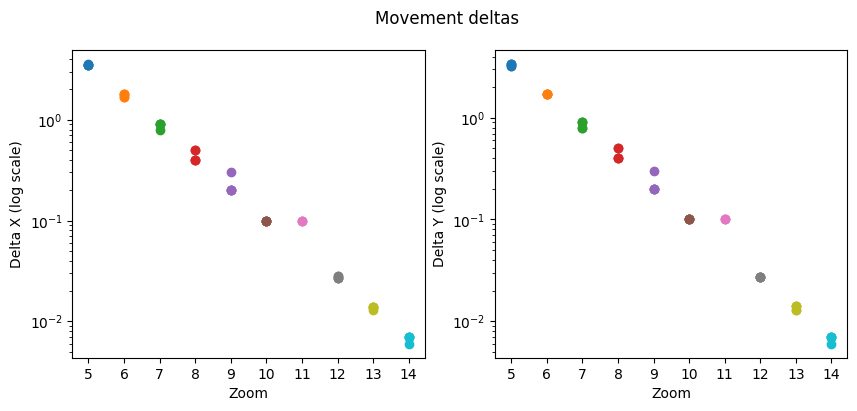

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Movement deltas")

axs[0].set_yscale('log')
axs[0].set_xlabel("Zoom")
axs[0].set_ylabel("Delta X (log scale)")
axs[0].set_xticks(zoomes, labels=zoomes)

for v in range(len(zoomes)):
  zoom = zoomes[v]
  deltas = dataDeltasX[v]
  axs[0].scatter(np.full(len(deltas), zoom), deltas)

axs[1].set_yscale('log')
axs[1].set_xlabel("Zoom")
axs[1].set_ylabel("Delta Y (log scale)")
axs[1].set_xticks(zoomes, labels=zoomes)

for v in range(len(zoomes)):
  zoom = zoomes[v]
  deltas = dataDeltasY[v]
  axs[1].scatter(np.full(len(deltas), zoom), deltas)

plt.show()

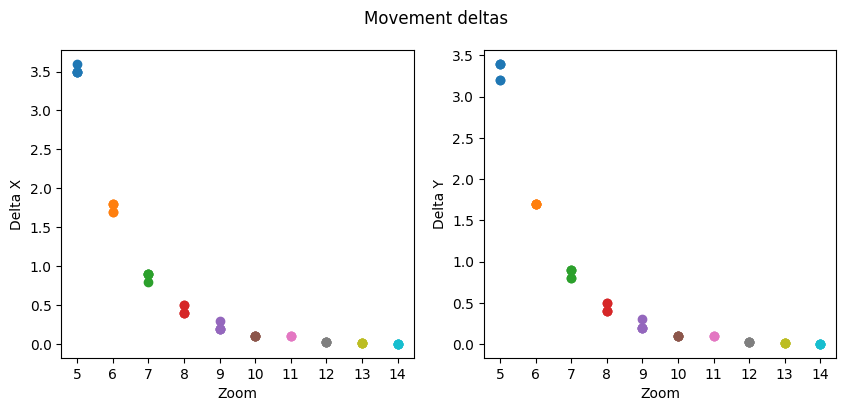

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Movement deltas")

axs[0].set_xlabel("Zoom")
axs[0].set_ylabel("Delta X")
axs[0].set_xticks(zoomes, labels=zoomes)

for v in range(len(zoomes)):
  zoom = zoomes[v]
  deltas = dataDeltasX[v]
  axs[0].scatter(np.full(len(deltas), zoom), deltas)

axs[1].set_xlabel("Zoom")
axs[1].set_ylabel("Delta Y")
axs[1].set_xticks(zoomes, labels=zoomes)

for v in range(len(zoomes)):
  zoom = zoomes[v]
  deltas = dataDeltasY[v]
  axs[1].scatter(np.full(len(deltas), zoom), deltas)

plt.show()

In [ ]:
stepsMapX = {}
steps = [np.median(i) for i in dataDeltasX]
for v in range(len(steps)):
  stepsMapX[zoomes[v]] = steps[v]
stepsMapX

In [ ]:
stepsMapY = {}
steps = [np.median(i) for i in dataDeltasY]
for v in range(len(steps)):
  stepsMapY[zoomes[v]] = steps[v]
stepsMapY

In [13]:
stepsMapX = {5: 3.5,
 6: 1.8000000000000007,
 7: 0.9000000000000004,
 8: 0.40000000000000036,
 9: 0.20000000000000107,
 10: 0.09999999999999964,
 11: 0.09999999999999964,
 12: 0.027000000000001023,
 13: 0.013999999999999346,
 14: 0.006999999999999673}

stepsMapY = {5: 3.3999999999999986,
 6: 1.6999999999999993,
 7: 0.9000000000000004,
 8: 0.40000000000000036,
 9: 0.1999999999999993,
 10: 0.09999999999999964,
 11: 0.09999999999999964,
 12: 0.026999999999999247,
 13: 0.013999999999999346,
 14: 0.006999999999999673}

In [80]:
def stepSelectorX(delta):
  minSteps = None
  suggestedStep = 0
  for step in stepsMapX:
    val = stepsMapX[step]
    needSteps = math.floor(abs(delta) / val)
    # print(f"{delta} % {val} ({step}) = {needSteps}")
    if (minSteps == None or minSteps > needSteps) and needSteps != 0:
      minSteps = needSteps
      suggestedStep = step
  return (suggestedStep, minSteps if delta > 0 else -minSteps)

def stepSelectorY(delta):
  minSteps = None
  suggestedStep = 0
  for step in stepsMapY:
    val = stepsMapY[step]
    needSteps = math.floor(abs(delta / val))
    # print(f"{delta} % {val} ({step}) = {needSteps}")
    if (minSteps == None or minSteps > needSteps) and needSteps != 0:
      minSteps = needSteps
      suggestedStep = step
  return (suggestedStep, minSteps if delta > 0 else -minSteps)

In [78]:
stepSelectorX(0.2)

(10, 2)

In [65]:
stepSelectorX(-10)

(5, -3)

In [67]:
def cmdGenX(target):
  cmds = []
  acc = 0

  while abs(target - acc) > 0.05:
      print(abs(target - acc))
      dcc = target - acc
      cmd = stepSelectorX(dcc)
      if cmd[0] == 0 or cmd[1] == None:
          break
      # (-1 if target < 0 else 1)
      acc += stepsMapX[cmd[0]] * cmd[1]
      cmds.append(cmd)

  return cmds

def cmdGenY(target):
  cmds = []
  acc = 0

  while abs(target - acc) > 0.05:
      dcc = abs(target - acc)
      cmd = stepSelectorY(dcc)
      if cmd[0] == 0 or cmd[1] == None:
          break
      acc += stepsMapY[cmd[0]] * cmd[1]
      cmds.append(cmd)

  return cmds

In [81]:
stepSelectorX(-0.2)

(10, -2)

In [82]:
cmdGenX(-0.2)

0.2


[(10, -2)]

In [69]:
cmdGenX(0.2)

0.2


[(10, 2)]

In [68]:
cmdGenX(100)

[(5, 28), (6, 1), (9, 1)]

In [71]:
# Control delta
np.sum([stepsMapX[x[0]] * x[1] for x in cmdGenX(9.5)])

9.481000000000005

In [72]:
# Steps
np.sum([cmd[1] for cmd in cmdGenX(100)])

30

In [73]:
cmdGenY(100)

[(5, 29), (7, 1), (8, 1), (10, 1)]

In [76]:
# Control delta
np.sum([stepsMapY[y[0]] * y[1] for y in cmdGenY(100)])

99.99999999999997

In [77]:
# Steps
np.sum([cmd[1] for cmd in cmdGenY(100)])

32

In [16]:
def mergeCmds(cmdsX, cmdsY):
  cmds = {}
  for zoom in zoomes:
    cX = [x for x in cmdsX if x[0] == zoom]
    cY = [y for y in cmdsY if y[0] == zoom]
    cmds[zoom] = (cX, cY)
  return [v for k, v in cmds.items() if not(v[0] == [] and v[1] == [])]

In [79]:
cmdGenY(-50)

[(5, -15), (7, 1), (12, 3)]

In [80]:
mergeCmds(cmdGenX(-100), cmdGenY(50))

[([(5, -29)], [(5, 14)]),
 ([], [(6, 1)]),
 ([(7, 1)], []),
 ([(8, 1)], [(8, 1)]),
 ([], [(9, 1)]),
 ([(10, 1)], [(10, 1)]),
 ([(12, 3)], [])]

In [166]:
stepsMapX

{5: 3.5,
 6: 1.8000000000000007,
 7: 0.9000000000000004,
 8: 0.40000000000000036,
 9: 0.20000000000000107,
 10: 0.09999999999999964,
 11: 0.09999999999999964,
 12: 0.027000000000001023,
 13: 0.013999999999999346,
 14: 0.006999999999999673}

In [29]:
def moveToPos(targetX, targetY, zoom=None):
    pos = getCurrentPosition()
    deltaX = targetX - pos["x"]
    deltaY = targetY - pos["y"]
    print(f"Delta for movement: x:{deltaX} y:{deltaY}")
    cmdsX = cmdGenX(deltaX)
    cmdsY = cmdGenY(deltaY)

    lastZoom = None

    cmds = mergeCmds(cmdsX, cmdsY)
    for cmdN, cmd in enumerate(cmds):
        print(f"Commands: {cmds}")
        xsteps = cmd[0]
        ysteps = cmd[1]
        for xstep in xsteps:
            if lastZoom != xstep[0]:
                zoomSet(xstep[0])
                lastZoom = xstep[0]
            err = 0
            currentPos = getCurrentPosition()
            controlPos = currentPos["x"] + stepsMapX[xstep[0]] * xstep[1]
            for tries in range(3):
                correction = int(err / stepsMapX[xstep[0]])
                moveX(xstep[1] if tries == 0 else correction)
                newPos = getCurrentPosition()
                err = newPos["x"] - controlPos
                print(
                    f"controlPos: {controlPos} / newPos.x: {newPos['x']} / err: {err} (max: {stepsMapX[xstep[0]] * 1.1})")
                if (abs(err) < stepsMapX[xstep[0]] * 1.1):
                    break
                else:
                    if tries == 0:
                        print(
                            f"Miss position with movement in X axis, try to fix. controlPos: {controlPos} / newPos.x: {newPos['x']} / err: {err} (max: {stepsMapX[xstep[0]] * 1.5})")
        for ystep in ysteps:
            if lastZoom != ystep[0]:
                zoomSet(ystep[0])
                lastZoom = ystep[0]
            err = 0
            currentPos = getCurrentPosition()
            controlPos = currentPos["y"] + stepsMapY[ystep[0]] * ystep[1]
            for tries in range(3):
                correction = int(err / stepsMapY[ystep[0]])
                moveY(ystep[1] if tries == 0 else correction)
                newPos = getCurrentPosition()
                err = newPos["y"] - controlPos
                print(
                    f"controlPos: {controlPos} / newPos.y: {newPos['y']} / err: {err} (max: {stepsMapY[ystep[0]] * 1.1})")
                if (abs(err) < stepsMapY[ystep[0]] * 1.1):
                    break
                else:
                    if tries == 0:
                        print(
                            f"Miss position with movement in Y axis, try to fix. controlPos: {controlPos} / newPos.y: {newPos['y']} / err: {err} (max: {stepsMapY[ystep[0]] * 1.5})")
        # Correct commands
        # pos = getCurrentPosition()
        # deltaX = targetX - pos["x"]
        # deltaY = targetY - pos["y"]
        # cmdsX = cmdGenX(deltaX)
        # cmdsY = cmdGenY(deltaY)
        # cmds = cmds[:cmdN + 1] + mergeCmds(cmdsX, cmdsY)
    if zoom != None:
        zoomSet(zoom)

In [33]:
cmdGenX(-0.2)

[(5, -1), (6, 1), (7, 1), (8, 1), (10, 1), (12, 3)]

In [31]:
moveToPos(132.0, 43.1, 11)

Delta for movement: x:-0.19999999999998863 y:0.0
Commands: [([(5, -1)], []), ([(6, 1)], []), ([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], [])]
controlPos: 128.7 / newPos.x: 128.7 / err: 0.0 (max: 3.8500000000000005)
Commands: [([(5, -1)], []), ([(6, 1)], []), ([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], [])]
controlPos: 130.5 / newPos.x: 130.4 / err: -0.09999999999999432 (max: 1.9800000000000009)
Commands: [([(5, -1)], []), ([(6, 1)], []), ([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(12, 3)], [])]
controlPos: 131.3 / newPos.x: 131.3 / err: 0.0 (max: 0.9900000000000004)
Commands: [([(5, -1)], []), ([(6, 1)], []), ([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(12, 3)], [])]


KeyboardInterrupt: 

In [197]:
moveToPos(139.890, 35.597, 12)

Commands: [([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(10, 1)], []), ([], [(12, 2)])]
controlPos: 139.20000000000002 / newPos.x: 139.1 / err: -0.10000000000002274 (max: 0.9900000000000004)
Commands: [([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(10, 1)], []), ([(12, 3)], [(12, 3)])]
controlPos: 139.5 / newPos.x: 139.6 / err: 0.09999999999999432 (max: 0.44000000000000045)
Commands: [([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(12, 3)], [(12, 3)])]
controlPos: 139.79999999999998 / newPos.x: 139.8 / err: 2.842170943040401e-14 (max: 0.2200000000000012)
Commands: [([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(12, 3)], [(12, 3)])]
controlPos: 139.9 / newPos.x: 139.9 / err: 0.0 (max: 0.10999999999999961)
Commands: [([(7, 1)], []), ([(8, 1)], []), ([(9, 1)], []), ([(12, 3)], [(12, 3)]), ([], [(12, 3)])]
controlPos: 35.586 / newPos.y: 35.577 / err: -0.009000000000000341 (max: 0.029699999999999175)


In [198]:
moveToPos(139.781, 35.206, 12)

Commands: [([(5, -1)], [(5, -1)]), ([(6, 1)], [(6, 1)]), ([(7, 1)], [(7, 1)]), ([(8, 1)], [(8, 1)]), ([(9, 1)], []), ([(12, 2)], [])]
controlPos: 136.4 / newPos.x: 136.4 / err: 0.0 (max: 3.8500000000000005)
controlPos: 32.2 / newPos.y: 32.7 / err: 0.5 (max: 3.739999999999999)
Commands: [([(5, -1)], [(5, -1)]), ([(6, 1)], [(6, 1)]), ([(7, 1)], []), ([(8, 1)], [(8, 2)]), ([(9, 1)], []), ([(12, 2)], [])]
controlPos: 138.20000000000002 / newPos.x: 138.2 / err: -2.842170943040401e-14 (max: 1.9800000000000009)
controlPos: 34.400000000000006 / newPos.y: 34.1 / err: -0.30000000000000426 (max: 1.8699999999999994)
Commands: [([(5, -1)], [(5, -1)]), ([(6, 1)], [(6, 1)]), ([(7, 1)], [(7, 1)]), ([(8, 1)], []), ([(9, 1)], [(9, 1)]), ([(12, 3)], [])]
controlPos: 139.1 / newPos.x: 139.0 / err: -0.09999999999999432 (max: 0.9900000000000004)
controlPos: 35.0 / newPos.y: 34.9 / err: -0.10000000000000142 (max: 0.9900000000000004)
Commands: [([(5, -1)], [(5, -1)]), ([(6, 1)], [(6, 1)]), ([(7, 1)], [(7, 1)]